# Decision Tree Classification

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, random_state = 3)

In [4]:
print(X_train)

[[    54  26000]
 [    40  75000]
 [    28  87000]
 [    42  64000]
 [    59  83000]
 [    46  28000]
 [    41  45000]
 [    47  34000]
 [    30  15000]
 [    59  88000]
 [    35  38000]
 [    35  61000]
 [    19  85000]
 [    42  53000]
 [    60  42000]
 [    43 133000]
 [    42  73000]
 [    51 146000]
 [    29 148000]
 [    47 107000]
 [    23  20000]
 [    57  60000]
 [    30  89000]
 [    48  96000]
 [    36 118000]
 [    45  45000]
 [    47  49000]
 [    36 144000]
 [    26  86000]
 [    25  22000]
 [    28  79000]
 [    48  74000]
 [    50  36000]
 [    35  77000]
 [    60  46000]
 [    21  88000]
 [    31  18000]
 [    37  33000]
 [    20  74000]
 [    37  80000]
 [    35  22000]
 [    45  79000]
 [    29  83000]
 [    57  33000]
 [    40  71000]
 [    57 122000]
 [    30  87000]
 [    33  41000]
 [    35  50000]
 [    43 112000]
 [    27  90000]
 [    20  23000]
 [    49  36000]
 [    46 117000]
 [    19  25000]
 [    48  35000]
 [    46  32000]
 [    37  71000]
 [    38  5100

In [5]:
print(y_train)

[1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0
 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0
 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1]


In [6]:
print(X_test)

[[    46  74000]
 [    47  25000]
 [    59  29000]
 [    20  49000]
 [    27  89000]
 [    40  78000]
 [    51  23000]
 [    23  48000]
 [    44  39000]
 [    27  17000]
 [    41  60000]
 [    39  42000]
 [    46  88000]
 [    35  53000]
 [    26  32000]
 [    24  19000]
 [    30  49000]
 [    24  84000]
 [    37 137000]
 [    40  60000]
 [    32  86000]
 [    34  25000]
 [    29  80000]
 [    42  65000]
 [    33 113000]
 [    31  58000]
 [    42  54000]
 [    52 150000]
 [    41  79000]
 [    46  23000]
 [    44 139000]
 [    28  32000]
 [    42 104000]
 [    46  96000]
 [    35  88000]
 [    41  52000]
 [    30 107000]
 [    38  61000]
 [    35  91000]
 [    20  82000]
 [    49 141000]
 [    27 137000]
 [    35 147000]
 [    39  42000]
 [    49  28000]
 [    42  70000]
 [    19  26000]
 [    45 131000]
 [    35  75000]
 [    25  87000]
 [    28  55000]
 [    29  75000]
 [    36  60000]
 [    27  96000]
 [    47  30000]
 [    41  87000]
 [    24  55000]
 [    47 105000]
 [    31  1500

In [7]:
print(y_test)

[0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1
 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0
 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 1 0 0 0 0 1 0 0 0]


## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
print(X_train)

[[ 1.50088738e+00 -1.28036183e+00]
 [ 1.86926568e-01  1.49150666e-01]
 [-9.39325557e-01  4.99235359e-01]
 [ 3.74635256e-01 -1.71760303e-01]
 [ 1.97015910e+00  3.82540461e-01]
 [ 7.50052631e-01 -1.22201438e+00]
 [ 2.80780912e-01 -7.26061066e-01]
 [ 8.43906975e-01 -1.04697204e+00]
 [-7.51616870e-01 -1.60127280e+00]
 [ 1.97015910e+00  5.28409084e-01]
 [-2.82345151e-01 -9.30277137e-01]
 [-2.82345151e-01 -2.59281476e-01]
 [-1.78401465e+00  4.40887910e-01]
 [ 3.74635256e-01 -4.92671271e-01]
 [ 2.06401344e+00 -8.13582240e-01]
 [ 4.68489599e-01  1.84122668e+00]
 [ 3.74635256e-01  9.08032173e-02]
 [ 1.21932435e+00  2.22048510e+00]
 [-8.45471214e-01  2.27883255e+00]
 [ 8.43906975e-01  1.08270985e+00]
 [-1.40859728e+00 -1.45540418e+00]
 [ 1.78245041e+00 -2.88455200e-01]
 [-7.51616870e-01  5.57582808e-01]
 [ 9.37761318e-01  7.61798879e-01]
 [-1.88490807e-01  1.40362082e+00]
 [ 6.56198287e-01 -7.26061066e-01]
 [ 8.43906975e-01 -6.09366169e-01]
 [-1.88490807e-01  2.16213765e+00]
 [-1.12703425e+00  4

In [10]:
print(X_test)

[[ 7.50052631e-01  1.19976942e-01]
 [ 8.43906975e-01 -1.30953555e+00]
 [ 1.97015910e+00 -1.19284066e+00]
 [-1.69016031e+00 -6.09366169e-01]
 [-1.03317990e+00  5.57582808e-01]
 [ 1.86926568e-01  2.36671839e-01]
 [ 1.21932435e+00 -1.36788300e+00]
 [-1.40859728e+00 -6.38539893e-01]
 [ 5.62343943e-01 -9.01103413e-01]
 [-1.03317990e+00 -1.54292535e+00]
 [ 2.80780912e-01 -2.88455200e-01]
 [ 9.30722243e-02 -8.13582240e-01]
 [ 7.50052631e-01  5.28409084e-01]
 [-2.82345151e-01 -4.92671271e-01]
 [-1.12703425e+00 -1.10531948e+00]
 [-1.31474293e+00 -1.48457790e+00]
 [-7.51616870e-01 -6.09366169e-01]
 [-1.31474293e+00  4.11714186e-01]
 [-9.46364633e-02  1.95792158e+00]
 [ 1.86926568e-01 -2.88455200e-01]
 [-5.63908182e-01  4.70061635e-01]
 [-3.76199495e-01 -1.30953555e+00]
 [-8.45471214e-01  2.95019288e-01]
 [ 3.74635256e-01 -1.42586578e-01]
 [-4.70053838e-01  1.25775219e+00]
 [-6.57762526e-01 -3.46802649e-01]
 [ 3.74635256e-01 -4.63497547e-01]
 [ 1.31317869e+00  2.33718000e+00]
 [ 2.80780912e-01  2

## Training the Decision Tree Classification model on the Training set

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=3)

## Predicting a new result

In [12]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predicting the Test set results

In [13]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]

## Making the Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[95 14]
 [ 8 43]]


0.8625

## Visualising the Training set results

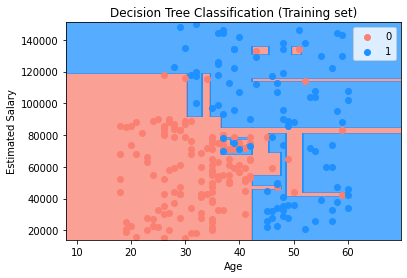

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

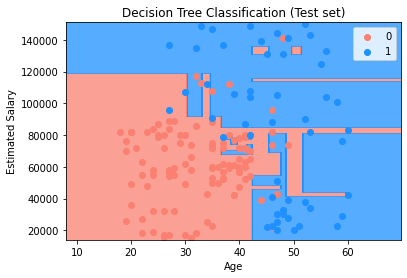

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()